<a href="https://colab.research.google.com/github/Upasanadhameliya/Python-Machine-Learning-Notebooks/blob/master/Keras_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


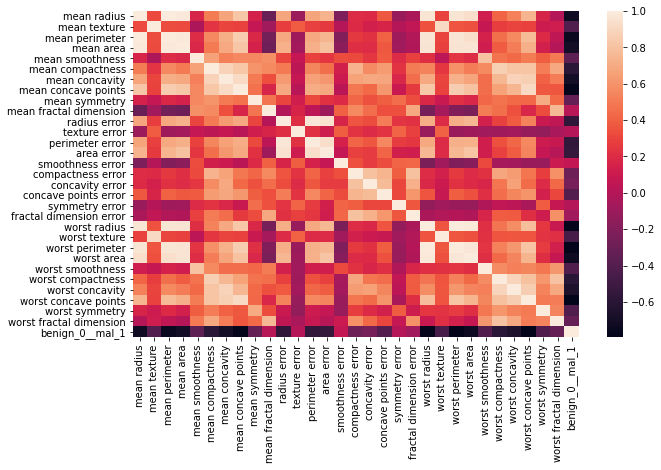

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

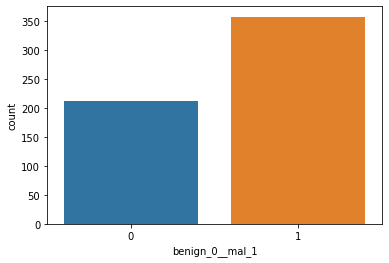

In [ ]:
sns.countplot(data=df,x='benign_0__mal_1')

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

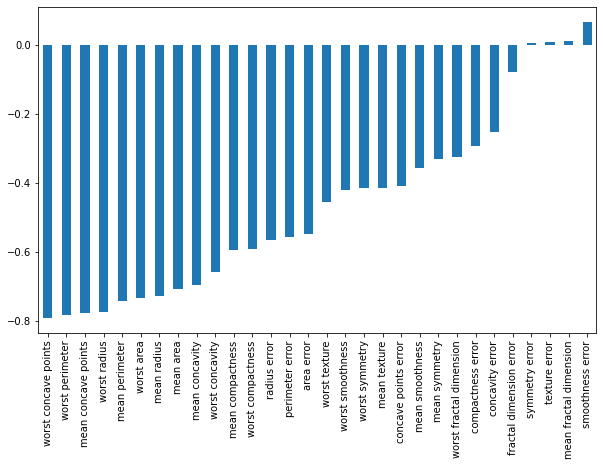

In [ ]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
sq = Sequential()

In [ ]:
sq.add(Dense(units=30,activation='relu'))

sq.add(Dense(units=15,activation='relu'))

sq.add(Dense(units=1,activation='sigmoid'))

In [ ]:
sq.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
sq.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 14ms/step - loss: 0.6870 - val_loss: 0.6699
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6538 - val_loss: 0.6345
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 0.5955
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5721 - val_loss: 0.5581
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5299 - val_loss: 0.5156
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4861 - val_loss: 0.4697
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4390 - val_loss: 0.4246
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3937 - val_loss: 0.3802
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3539 - val_loss: 0.3412
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3156 - val_loss: 0.3115
Epoch 11

In [ ]:
losses = pd.DataFrame(sq.history.history)

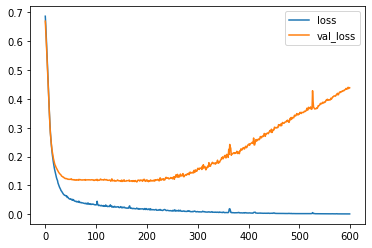

In [ ]:
losses.plot()

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [ ]:
sq = Sequential()

sq.add(Dense(units=30,activation='relu'))

sq.add(Dense(units=15,activation='relu'))

sq.add(Dense(units=1,activation='sigmoid'))

sq.compile(optimizer='adam',loss='binary_crossentropy')


In [ ]:
sq.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/600
13/13 [==============================] - 0s 9ms/step - loss: 0.6887 - val_loss: 0.6652
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6489 - val_loss: 0.6299
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6106 - val_loss: 0.5916
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5685 - val_loss: 0.5523
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5249 - val_loss: 0.5091
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4790 - val_loss: 0.4655
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4328 - val_loss: 0.4174
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3869 - val_loss: 0.3727
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3427 - val_loss: 0.3340
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3022 - val_loss: 0.2984
Epoch 11/

In [ ]:
losses = pd.DataFrame(sq.history.history)

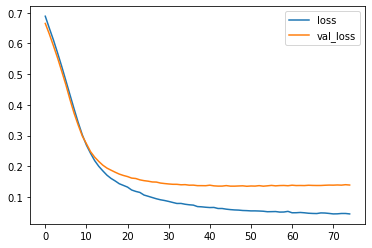

In [ ]:
losses.plot()

In [ ]:
sq = Sequential()

sq.add(Dense(units=30,activation='relu'))
sq.add(Dropout(rate=0.5))

sq.add(Dense(units=15,activation='relu'))
sq.add(Dropout(rate=0.5))

sq.add(Dense(units=1,activation='sigmoid'))

sq.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
sq.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6621 - val_loss: 0.6556
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6529 - val_loss: 0.6326
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6425 - val_loss: 0.6094
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6230 - val_loss: 0.5862
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5947 - val_loss: 0.5628
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5711 - val_loss: 0.5401
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5582 - val_loss: 0.5158
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5384 - val_loss: 0.4911
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5373 - val_loss: 0.4703
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4983 - val_loss: 0.4480
Epoch 11

In [ ]:
losses = pd.DataFrame(sq.history.history)

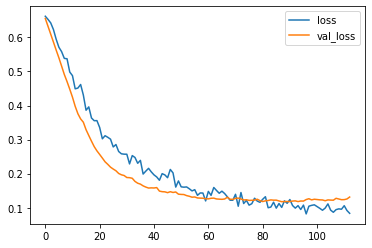

In [ ]:
losses.plot()

In [ ]:
pred = (sq.predict(X_test) > 0.5).astype('int32')

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.97      0.97      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
print(confusion_matrix(y_test,pred))

[[ 63   3]
 [  3 102]]
